In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.regularizers import l2,l1_l2,l1
import pickle as pkl

In [2]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [3]:
complete_data = {}
with open('data_2.pkl','rb') as handle:
  complete_data = pkl.load(handle)

In [4]:
complete_data

{'training': array([[[169, 174, 169, ..., 170, 170, 167],
         [169, 175, 171, ..., 171, 170, 169],
         [169, 175, 171, ..., 170, 168, 168],
         ...,
         [140, 133, 118, ..., 118, 120, 120],
         [134, 127, 115, ..., 120, 118, 116],
         [131, 127, 115, ..., 116, 117, 118]],
 
        [[172,  66, 146, ..., 140, 139, 139],
         [171,  63, 150, ..., 158, 148, 138],
         [167,  59, 151, ..., 156, 146, 133],
         ...,
         [100,  35,  80, ..., 169, 146, 186],
         [103,  36, 114, ..., 196, 147, 166],
         [104,  50, 130, ..., 185, 165, 144]],
 
        [[143, 139, 133, ..., 132, 126, 133],
         [141, 137, 135, ..., 136, 153, 151],
         [139, 137, 113, ..., 157, 157, 152],
         ...,
         [110, 114, 100, ..., 120, 120, 121],
         [108, 109, 109, ..., 114, 113, 114],
         [106, 111, 105, ...,  93, 109, 109]],
 
        ...,
 
        [[ 40,  70,  87, ..., 180, 170, 170],
         [ 34, 101,  94, ..., 175, 173, 156],
  

In [5]:
x_train = complete_data['training']/255
x_test = complete_data['testing']/255
y_train = complete_data['train_output']
y_test = complete_data['test_output']

In [6]:
x_train.shape

(33604, 32, 32)

In [7]:
x_validation = x_train[25000:]
y_validation = y_train[25000:]

In [8]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32,1),kernel_regularizer=l2(0.0002)))
model1.add(layers.MaxPooling2D((2, 2)))
# model1.add(layers.AveragePooling2D((2,2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
# model1.add(layers.AveragePooling2D((2,2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [9]:
model1.add(layers.Flatten())
model1.add(layers.Dropout(0.2))
model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dense(6,activation='softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [10]:
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# model1.compile(loss='categorical_crossentropy',
#               optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),
#               metrics=['acc'])

filename='asl_model2.h5'
checkpoint= ModelCheckpoint(filename,monitor='val_loss',verbose=1,save_best_only=True,mode='min')

history = model1.fit(x_train, y_train, epochs=50,validation_data=(x_validation,y_validation),batch_size=512,callbacks=[checkpoint])

Epoch 1/50
66/66 [==============================] - ETA: 0s - loss: 1.0558 - accuracy: 0.6226
Epoch 1: val_loss improved from inf to 0.42894, saving model to asl_model2.h5
66/66 [==============================] - 9s 23ms/step - loss: 1.0558 - accuracy: 0.6226 - val_loss: 0.4289 - val_accuracy: 0.8634
Epoch 2/50
65/66 [============================>.] - ETA: 0s - loss: 0.2722 - accuracy: 0.9174
Epoch 2: val_loss improved from 0.42894 to 0.14712, saving model to asl_model2.h5
66/66 [==============================] - 1s 16ms/step - loss: 0.2712 - accuracy: 0.9177 - val_loss: 0.1471 - val_accuracy: 0.9587
Epoch 3/50
65/66 [============================>.] - ETA: 0s - loss: 0.1242 - accuracy: 0.9633
Epoch 3: val_loss improved from 0.14712 to 0.07730, saving model to asl_model2.h5
66/66 [==============================] - 1s 16ms/step - loss: 0.1240 - accuracy: 0.9634 - val_loss: 0.0773 - val_accuracy: 0.9801
Epoch 4/50
65/66 [============================>.] - ETA: 0s - loss: 0.0814 - accuracy:

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

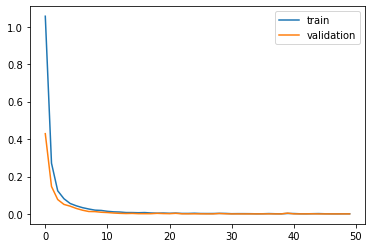

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])
plt.show()

In [ ]:
models.save_model(model1,'asl_model2.h5')

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
import numpy as np

In [24]:
np.argmax(model1.predict(np.array([x_test[25]])))

1/1 [==============================] - 0s 15ms/step


5

In [25]:
y_test[25]

5

In [26]:
x_test.shape

(8402, 32, 32)

In [27]:
set(y_test)

{0, 1, 2, 3, 4, 5}

In [28]:
total = 0
correct = 0
for i in range(x_test.shape[0]):
  total+=1
  if np.argmax(model1.predict(np.array([x_test[i]]))) == y_test[i]:
    correct+=1
print(f"Accuracy: {correct*100/total}")

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 19ms/step
Accuracy: 99.98809807188765
